# Analyzing Social Media's Impact on Mental Health

## Motivation and Problem Statement 

Social media has become a central part of daily life. Social media allows for connection and information sharing but there have been growing concerns regarding the impact social media has on user's mental health. Some studies show that certain types of social media usage have a positive correlation with increased anxiety, stress, and a decrease in self-esteem. 

The goal of this project is to explore how social media usage is associated with mental health. From a Human-Centered perspective, understanding this relationship can help inform mental health educators and promote healthier digital habits. This analysis can also provide insight for individuals to self-regulate their social media usage. I want to identify patterns and behaviors that may be associated with positive or negative mental health outcomes. 

## Data Selected for Analysis 

The dataset that I want to use is the "Social Media and Mental Health" dataset on Kaggle. This dataset has survey responses on various aspects of social media and mental health indicators. It also contains demographic information which can give insights across age groups and gender. 

[Link to the Dataset](https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health)

This dataset is available under the Creative Commons License. 

I think this dataset is suitable for my research goal because it contains both social media and mental health indicators which is the main part of my analysis. 

One ethical consideration is that since the data in the dataset is all self-reported, participants may under-report or over-report  their social media usage and mental health status.  

## Unknowns and Dependencies 

There are a couple of unknowns and dependencies. First is that because the data is all self-reported, there may be biased that affect the accuracy of my findings. Second, there may be missing data that could require extra cleaning. Third, is that the dataset is not really clear on what types of content is consumed on the apps which could effect the results. 

## Overview 

This project aims to investigate the relationship between social media usage patterns and mental health. By analyzing survey data on social media usage and mental health indicators, the goal is to find patterns of how social media use may correlate with positive or negative mental health. Insights from this research could help individuals regulate their social media usage and make healthier digital habits. 

## Research Questions 

1. How does the amount of time spent on social media correlate with levels of anxiety and stress among users?
2. Does the type of content consumed on social media impact mental health differently?
3. Are there differences in mental health impacts of social media based on demographic factors? 


## Background and Related Work 

social media's impact on mental health has been a hot topic with multiple studies showing both positive and negative correlations. Research studies have shown that prolonged use of social media can be associated with higher levels of depression and loneliness. It was also found that teenagers who spent more than three hours a day on social media felt isolated (https://pmc.ncbi.nlm.nih.gov/articles/PMC6214874/). 

On the other hand, some studies have shown that social media has some positive effects. Some users reported feeling more connected and supported, being able to reach out to their friends and keep up with their lives through their posts (https://academic.oup.com/joc/article/71/1/56/6124731?login=false). To me, these mixed findings mean that social media can impact mental health depending on how it is used and the content the users are watching. 

The previous studies will influence my decisions on this study because they suggest specific factors and demographics to study. Specifically looking at time spent, usage type, platform type, feedback, age, gender, cultural background, and education level.  


## Methodology 

My methodology to investigate this data and present my findings will have multiple steps. First, I will clean and prepare the data. For this dataset, it means renaming the columns because some of them have long names which could make the code messy, and dealing with missing values. 

Once the data is cleaned and ready, I will calculate some descriptive statistics to get an overview of the dataset. Statistics like mean, median, and standard deviation could help set a baseline and help with analysis. I then plan to create a correlation matrix to highlight any correlations between variables. I also plan to use linear regression to construct a model to examine the coefficients and understand how each of the different factors correlates with mental health. 

I also plan to create some visualizations as well. I will use a heatmap to show the correlations between different variables, and a bar chart to visualize the differences in mental health outcomes across different usage patterns or demographic groups. 

I think these methods are good for this study because they allow us to see the overview of relationships through correlations and visualizations and get an in-depth look at how specific behaviors are linked to mental health outcomes through regression. 

# Data Analysis


### Data Preprocessing  

First get all of the relevant imports for the analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score



Load in the data, and check the first five rows to see what is in the dataset

In [3]:
data = pd.read_csv("smmh.csv")
data.head(5)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


Check the shape of the dataset to see how many rows and columns are in the dataset

In [4]:
data.shape

(481, 21)

### Working with the Columns

When looking at all of the columns in the dataset, we can see that columns 5 through 20 are very long. Renaming the columns will make the data analysis easier 

In [5]:
data.columns

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

In [6]:
data.rename(columns = {'1. What is your age?':'Age','2. Gender':'Gender','3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Hours Per Day',
                       '9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
                       '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
                       '17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
                       '18. How often do you feel depressed or down?':'Depression Q1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)

data.columns


Index(['Timestamp', 'Age', 'Gender', 'Relationship Status', 'Occupation',
       'Affiliations', 'Social Media User?', 'Platforms Used', 'Hours Per Day',
       'ADHD Q1', 'ADHD Q2', 'Anxiety Q1', 'ADHD Q3', 'Anxiety Q2', 'ADHD Q4',
       'Self Esteem Q1', 'Self Esteem Q2', 'Self Esteem Q3', 'Depression Q1',
       'Depression Q2', 'Depression Q3'],
      dtype='object')

Now the columns are shorter which will make handling the data easier. There are also some columns that I won't be needing in my analysis because they do not add information. For example, Timestamp does not add to the dataset, other than telling us when individuals took the survey. Affiliations also does not add because it tells us the same thing as Occupation.  

In [7]:
things_to_drop = ["Timestamp", "Affiliations"]
data.drop(things_to_drop, inplace=True, axis=1)
data.columns

Index(['Age', 'Gender', 'Relationship Status', 'Occupation',
       'Social Media User?', 'Platforms Used', 'Hours Per Day', 'ADHD Q1',
       'ADHD Q2', 'Anxiety Q1', 'ADHD Q3', 'Anxiety Q2', 'ADHD Q4',
       'Self Esteem Q1', 'Self Esteem Q2', 'Self Esteem Q3', 'Depression Q1',
       'Depression Q2', 'Depression Q3'],
      dtype='object')

After dropping the columns, I realized that some of the columns are out of order. For example, ADHD Q1, ADHD Q2, Anxiety Q1, ADHD Q3, Anxiety Q2, and ADHD Q4 should be grouped by their categories. 

In [8]:
columns = list(data.columns)
columns[9], columns[10] = columns[10], columns[9]
columns[11], columns[12] = columns[12], columns[11]
columns[10], columns[11] = columns[11], columns[10]
data = data[columns]
data.columns

Index(['Age', 'Gender', 'Relationship Status', 'Occupation',
       'Social Media User?', 'Platforms Used', 'Hours Per Day', 'ADHD Q1',
       'ADHD Q2', 'ADHD Q3', 'ADHD Q4', 'Anxiety Q1', 'Anxiety Q2',
       'Self Esteem Q1', 'Self Esteem Q2', 'Self Esteem Q3', 'Depression Q1',
       'Depression Q2', 'Depression Q3'],
      dtype='object')

### Missing Values

Next, I wanted to check to see if there were any missing values in the dataset. After checking the dataset, there are no missing values in the columns

In [9]:
missing_values = data.isna().sum()
missing_values

Age                    0
Gender                 0
Relationship Status    0
Occupation             0
Social Media User?     0
Platforms Used         0
Hours Per Day          0
ADHD Q1                0
ADHD Q2                0
ADHD Q3                0
ADHD Q4                0
Anxiety Q1             0
Anxiety Q2             0
Self Esteem Q1         0
Self Esteem Q2         0
Self Esteem Q3         0
Depression Q1          0
Depression Q2          0
Depression Q3          0
dtype: int64

### Column Values

When I was glancing at the dataset I saw that some columns were strings because of how the data was collected. This means that they were able to enter their own values for their Gender. 

Looking at the values, I saw {'There are others???', 'Trans', 'Nonbinary ', 'Female', 'Male', 'Non-binary', 'unsure ', 'Non binary ', 'NB'}. Looking at this, I wanted to normalize the "Nonbinary" "Non-binary" "Non binary" and "NB" values into one string. 


In [10]:
for cols in data.columns:
    print(cols, set(data[cols]))

Age {26.7, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 40.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 55.0, 56.0, 60.0, 65.0, 69.0, 91.0}
Gender {'Female', 'Non binary ', 'There are others???', 'Trans', 'unsure ', 'Male', 'Non-binary', 'NB', 'Nonbinary '}
Relationship Status {'Single', 'Divorced', 'In a relationship', 'Married'}
Occupation {'University Student', 'Retired', 'Salaried Worker', 'School Student'}
Social Media User? {'Yes', 'No'}
Platforms Used {'Facebook, Instagram, YouTube, TikTok', 'Facebook, Twitter, Instagram, YouTube, Reddit, Pinterest', 'Facebook, Discord', 'Instagram', 'Facebook, Instagram, YouTube, Reddit', 'Facebook, YouTube, Pinterest', 'TikTok', 'Facebook, YouTube', 'Facebook, TikTok', 'Facebook, Instagram, YouTube, Snapchat, Discord, Reddit, TikTok', 'Facebook, Twitter, Instagram, YouTube, Snapchat, Discord, Reddit, Pint

In [11]:
data.replace('Non-binary','Non-Binary', inplace=True)
data.replace('Nonbinary ','Non-Binary', inplace=True)
data.replace('NB','Non-Binary', inplace=True)
data.replace('Non binary ','Non-Binary', inplace=True)
print(set(data['Gender']))

{'Female', 'There are others???', 'Trans', 'unsure ', 'Male', 'Non-Binary'}


When looking at the dataset, it also looked like the scale for Self Esteem Q2 was reversed. Every other questions follows: 

- 1 = very negative
- 2 = very positivenegative
- 3 = netral
- 4 = positive
- 5 = very positive

Question 2 asks: "Following the previous question, how do you feel about these comparisons, generally speaking?". Because of the scale that this question uses needs to be reversed 
- 5 = very negative
- 4 = slightly negative
- 3 = neutral
- 2 = slightly positive
- 1 = very positive

In [12]:
data.loc[data['Self Esteem Q2'] == 1, 'Self Esteem Q2'] = 5
data.loc[data['Self Esteem Q2'] == 2, 'Self Esteem Q2'] = 4
data.loc[data['Self Esteem Q2'] == 3, 'Self Esteem Q2'] = 3
data.loc[data['Self Esteem Q2'] == 4, 'Self Esteem Q2'] = 2
data.loc[data['Self Esteem Q2'] == 5, 'Self Esteem Q2'] = 1

Finally, I wanted to add up the different mental health screening questions to get a final score for each row/individual. Doing this will make comparisons easier. The questions are as follows: 
- 4 ADHD Questions (A possible highest total score of 20)
- 2 Anxiety Questions (A possible highest total score of 10)
- 3 Self Esteem Questions (A possible highest total score of 15)
- 3 Depression Questions (A possible highest total score of 15)

With these 12 questions, the highest total score an individual can get is 60. With this, I added a new column that calculates this total score which shows the total sum of the screening questions. I also added columns that calculated the total score for each screening category 



In [13]:

ADHD = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
Anxiety = ['Anxiety Q1', 'Anxiety Q2']
SelfEsteem = ['Self Esteem Q1', 'Self Esteem Q2', 'Self Esteem Q3']
Depression = ['Depression Q1', 'Depression Q2', 'Depression Q3']
Total = [ADHD, Anxiety, SelfEsteem, Depression]

data["ADHD Score"] = data[ADHD].sum(axis=1)
data["Anxiety Score"] = data[Anxiety].sum(axis=1)
data["Self Esteem Score"] = data[SelfEsteem].sum(axis=1)
data["Depression Score"] = data[Depression].sum(axis=1)
data['Total Score'] = 0


for group in Total:
    data['Total Score'] += data[group].sum(axis=1)

just_scores = data.copy()


just_scores.drop(columns=ADHD + Anxiety + SelfEsteem + Depression, inplace=True)
just_scores.head()


,Age,Gender,Relationship Status,Occupation,Social Media User?,Platforms Used,Hours Per Day,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score
0,21.0,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,18,4,7,14,43
1,21.0,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,15,7,7,14,43
2,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,11,6,7,11,35
3,21.0,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,12,6,8,9,35
4,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,17,9,9,9,44


### Data Analysis

1. How does the amount of time spent on social media correlate with levels of anxiety and stress among users?
2. Does the type of content consumed on social media impact mental health differently?
3. Are there differences in mental health impacts of social media based on demographic factors? 


## 1. How does the amount of time spent on social media correlate with levels of anxiety and stress among users?
- CHANGE TO TOTAL SCORE 
- LOOK AT ANXIETY AND STRESS 
- MAKE SENSE OF WHAT THE NUMBERS/SCORES MEAN

In [14]:
def plot_scores(data, x, y):
    fig, ax = plt.subplots()
    ax.bar(just_scores[x], data[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(x + " vs " + y)
    plt.xticks(rotation=45)
    plt.show()
    
just_scores.columns

Index(['Age', 'Gender', 'Relationship Status', 'Occupation',
       'Social Media User?', 'Platforms Used', 'Hours Per Day', 'ADHD Score',
       'Anxiety Score', 'Self Esteem Score', 'Depression Score',
       'Total Score'],
      dtype='object')

Plotting ADHD 

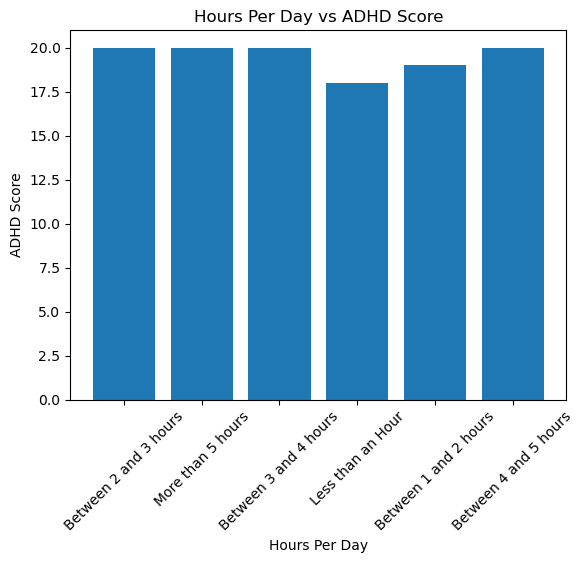

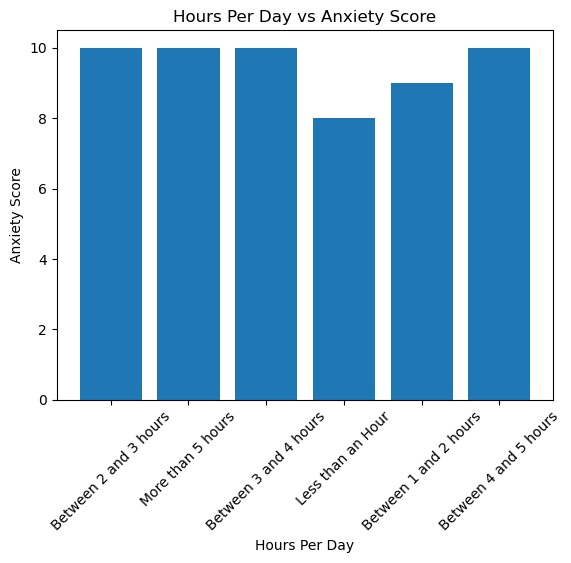

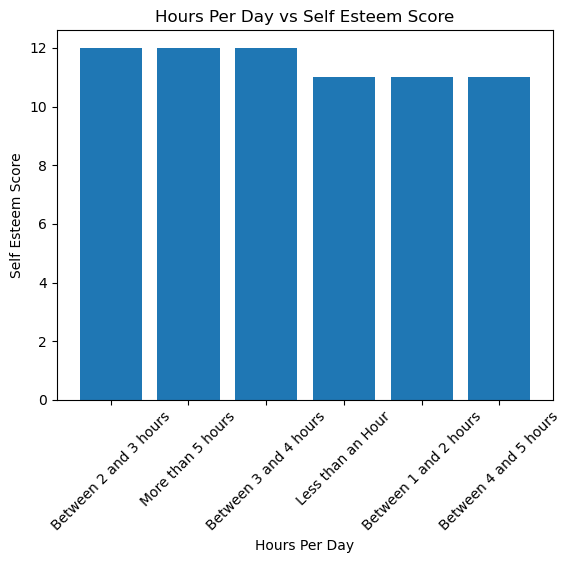

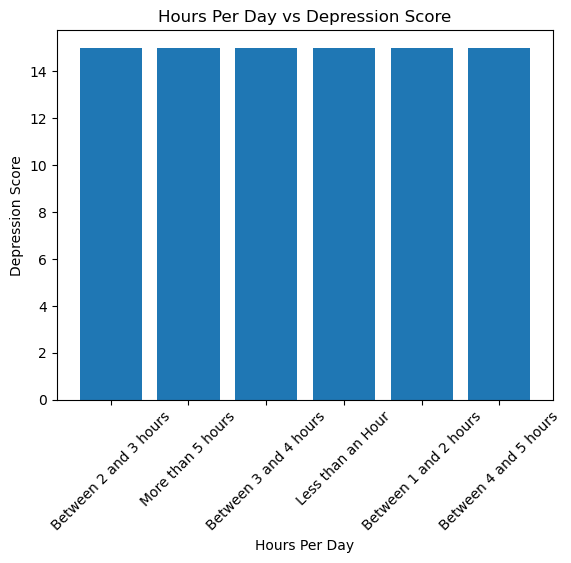

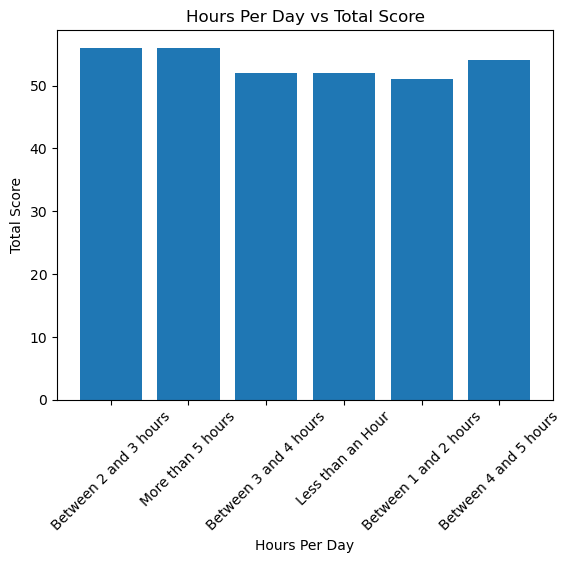

In [15]:
plot_scores(just_scores, "Hours Per Day", "ADHD Score")
plot_scores(just_scores, "Hours Per Day", "Anxiety Score")
plot_scores(just_scores, "Hours Per Day", "Self Esteem Score")
plot_scores(just_scores, "Hours Per Day", "Depression Score")
plot_scores(just_scores, "Hours Per Day", "Total Score")




## 2. Does the type of content consumed on social media impact mental health differently?

- SEE HOW DIFFERENT SOCIAL MEDIAS AFFECT THE CORRELATION 
- CAN ALSO SEE IF SOMEONE USES ONE THING, WILL THEY USE ANOTHER 

In [16]:
corelation_data_platforms = data.copy()
platforms = ['Facebook', 'Twitter', 'Instagram', 'YouTube', 'Discord', 'Pinterest']
for platform in platforms:
    corelation_data_platforms[platform] = corelation_data_platforms['Platforms Used'].apply(lambda x: 1 if platform in x else 0)

corelation_data_platforms.drop(columns=["Platforms Used"], inplace=True)
correlation_matrix_platform = corelation_data_platforms[platforms].corr()
print(correlation_matrix_platform)

           Facebook   Twitter  Instagram   YouTube   Discord  Pinterest
Facebook   1.000000 -0.010952   0.228197  0.220021 -0.006305   0.104318
Twitter   -0.010952  1.000000   0.217106  0.170429  0.152544   0.157839
Instagram  0.228197  0.217106   1.000000  0.279432  0.157490   0.226764
YouTube    0.220021  0.170429   0.279432  1.000000  0.185635   0.178365
Discord   -0.006305  0.152544   0.157490  0.185635  1.000000   0.122547
Pinterest  0.104318  0.157839   0.226764  0.178365  0.122547   1.000000


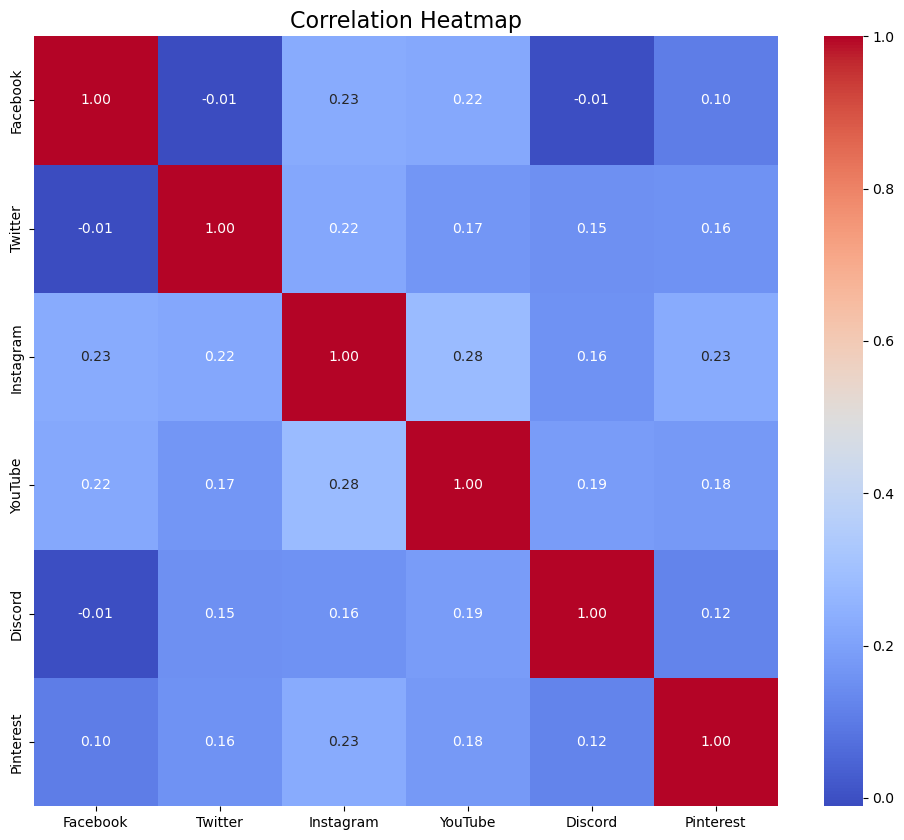

In [17]:
plt.figure(figsize=(12, 10))  
sns.heatmap(
    correlation_matrix_platform, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f",  
    annot_kws={"size": 10}  
)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [18]:
### PLATFORMS AND SCORES 
corelation_data = data.copy()
platforms = ['Facebook', 'Twitter', 'Instagram', 'YouTube', 'Discord', 'Pinterest']
for platform in platforms:
    corelation_data[platform] = corelation_data['Platforms Used'].apply(lambda x: 1 if platform in x else 0)

corelation_data.drop(columns=["Platforms Used"], inplace=True)
correlation_matrix = corelation_data[platforms + ['ADHD Score', 'Anxiety Score', 'Self Esteem Score', 'Depression Score', 'Total Score']].corr()
print(correlation_matrix)

                   Facebook   Twitter  Instagram   YouTube   Discord  \
Facebook           1.000000 -0.010952   0.228197  0.220021 -0.006305   
Twitter           -0.010952  1.000000   0.217106  0.170429  0.152544   
Instagram          0.228197  0.217106   1.000000  0.279432  0.157490   
YouTube            0.220021  0.170429   0.279432  1.000000  0.185635   
Discord           -0.006305  0.152544   0.157490  0.185635  1.000000   
Pinterest          0.104318  0.157839   0.226764  0.178365  0.122547   
ADHD Score         0.092667 -0.039916   0.230805  0.038504  0.111083   
Anxiety Score      0.113218  0.023910   0.224852  0.054632  0.062418   
Self Esteem Score  0.160445 -0.064427   0.147657  0.040556 -0.032628   
Depression Score   0.084266 -0.039434   0.188443  0.036864  0.098772   
Total Score        0.132476 -0.040408   0.249482  0.051182  0.087625   

                   Pinterest  ADHD Score  Anxiety Score  Self Esteem Score  \
Facebook            0.104318    0.092667       0.113218  

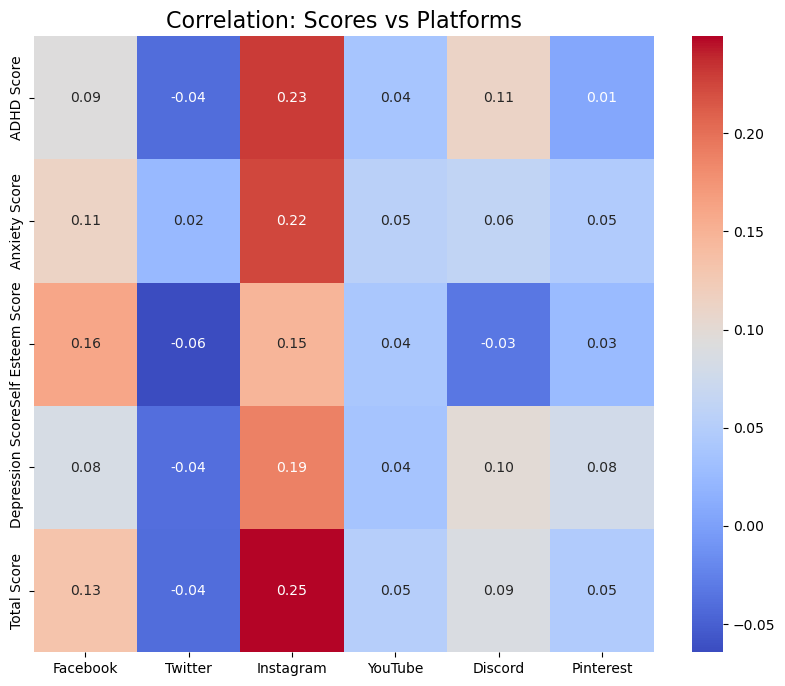

In [19]:
scores = ['ADHD Score', 'Anxiety Score', 'Self Esteem Score', 'Depression Score', 'Total Score']
platforms = ['Facebook', 'Twitter', 'Instagram', 'YouTube', 'Discord', 'Pinterest']
scores_vs_platforms = correlation_matrix.loc[scores, platforms]

plt.figure(figsize=(10, 8))

sns.heatmap(
    scores_vs_platforms, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f",  
    annot_kws={"size": 10}
)

plt.title("Correlation: Scores vs Platforms", fontsize=16)
plt.show()


## 3. Are there differences in mental health impacts of social media based on demographic factors? 
- CHANGE TO TOTAL SCORE 
- LOOK AT ANXIETY AND STRESS 
- MAKE SENSE OF WHAT THE NUMBERS/SCORES MEAN

In [40]:
data.columns

Index(['Age', 'Gender', 'Relationship Status', 'Occupation',
       'Social Media User?', 'Platforms Used', 'Hours Per Day', 'ADHD Q1',
       'ADHD Q2', 'ADHD Q3', 'ADHD Q4', 'Anxiety Q1', 'Anxiety Q2',
       'Self Esteem Q1', 'Self Esteem Q2', 'Self Esteem Q3', 'Depression Q1',
       'Depression Q2', 'Depression Q3', 'ADHD Score', 'Anxiety Score',
       'Self Esteem Score', 'Depression Score', 'Total Score'],
      dtype='object')

In [43]:


df = just_scores.copy()

excluded_columns = [
    'Platforms Used', 'Total Score',  
    'ADHD Score', 'Depression Score', 'Self Esteem Score', 'Anxiety Score'
]

X = df.drop(columns=excluded_columns)
y = df['Total Score']

categorical_columns = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough' 
)

X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

feature_names = preprocessor.get_feature_names_out()
coefficients = model.coef_

feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


                                       Feature  Coefficient
11                 cat__Social Media User?_Yes    12.184201
16        cat__Hours Per Day_More than 5 hours     7.440995
14    cat__Hours Per Day_Between 4 and 5 hours     6.254014
13    cat__Hours Per Day_Between 3 and 4 hours     4.411842
12    cat__Hours Per Day_Between 2 and 3 hours     3.680868
10          cat__Occupation_University Student     2.782278
8              cat__Occupation_Salaried Worker     1.306835
0                             cat__Gender_Male     0.327386
3                            cat__Gender_Trans     0.000000
4                          cat__Gender_unsure      0.000000
17                              remainder__Age    -0.091055
9               cat__Occupation_School Student    -0.697212
1                       cat__Gender_Non-Binary    -1.290123
7              cat__Relationship Status_Single    -2.232156
5   cat__Relationship Status_In a relationship    -2.638977
6             cat__Relationship Status_M

In [ ]:

df = just_scores.copy()



all_platforms = set(
    platform.strip()
    for platforms in df['Platforms Used']
    for platform in platforms.split(',')
)

for platform in all_platforms:
    df[platform] = df['Platforms Used'].apply(lambda x: 1 if platform in x else 0)

# print(df.head())

excluded_columns = [
    'Platforms Used', 'Total Score',  # Exclude target and original platforms column
    'ADHD Score', 'Depression Score', 'Self Esteem Score', 'Anxiety Score'
]

X = df.drop(columns=excluded_columns)
y = df['Total Score']

categorical_columns = X.select_dtypes(include=['object']).columns


# Leave documentation for this 
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough' 
)

X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

feature_names = preprocessor.get_feature_names_out()
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


                                       Feature   Coefficient
11                 cat__Social Media User?_Yes  1.077788e+01
16        cat__Hours Per Day_More than 5 hours  6.528580e+00
14    cat__Hours Per Day_Between 4 and 5 hours  5.566316e+00
13    cat__Hours Per Day_Between 3 and 4 hours  3.895907e+00
23                           remainder__TikTok  3.364858e+00
12    cat__Hours Per Day_Between 2 and 3 hours  3.248525e+00
10          cat__Occupation_University Student  2.421324e+00
18                        remainder__Instagram  1.908833e+00
0                             cat__Gender_Male  1.278452e+00
8              cat__Occupation_Salaried Worker  1.190787e+00
20                         remainder__Facebook  1.021578e+00
24                         remainder__Snapchat  1.020098e+00
26                        remainder__Pinterest  5.733061e-03
3                            cat__Gender_Trans -2.664535e-15
4                          cat__Gender_unsure  -1.509903e-14
17                      